# **Aprendizaje no supervisado**
## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [3]:
#Se carga el DataSet
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

In [4]:
#Experimento 1
pca = PCA()
datos_pca = pca.run(data)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [5]:
print("% de varianza descrita por cada caracteristica")
print(pca.valores_propios/np.sum(pca.valores_propios) * 100)

% de varianza descrita por cada caracteristica
[40.2421075  14.92319678 12.05966259  9.55476403  0.0856073   0.78320024
  6.62181391  4.33682036  6.02717076  5.36565652]


(442, 2)


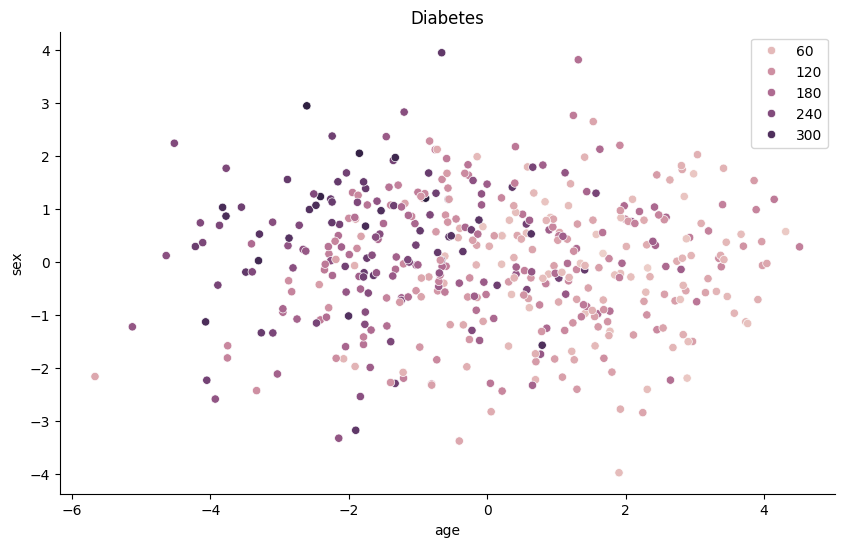

In [6]:
pca.dibujar("Diabetes", diabetes.feature_names[0:2], target, datos_pca)

##**Taller # 1**

* Utilizar dataset blue jays
* Realizar analisis bivariado todos contra todos tal como se explicó
* Interpretar resultados del analisis bivariado
* Calcule la matriz de covarianza y sus valores y vectores propios (discuta los resultados con su grupo)
* Determine cuantos y cuales componentes son necesarios para describir el 90% de la varianza de los datos

##**SOLUCION**

##**Importamos las bibliotecas, Cargamos el dataset y Filtramos las columnas.**

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Utilizar dataset blue jays
blue_jays = pd.read_csv('blue_jays.csv')

# Filtrar las columnas a utilizar para el análisis bivariado
variables = ["bill_depth_mm", "bill_width_mm", "bill_length_mm", "head_length_mm", "body_mass_g", "skull_size_mm"]
data_filtrada = blue_jays[variables]

##**Creamos los diagramas de dispersión para el estudio bivariado.**

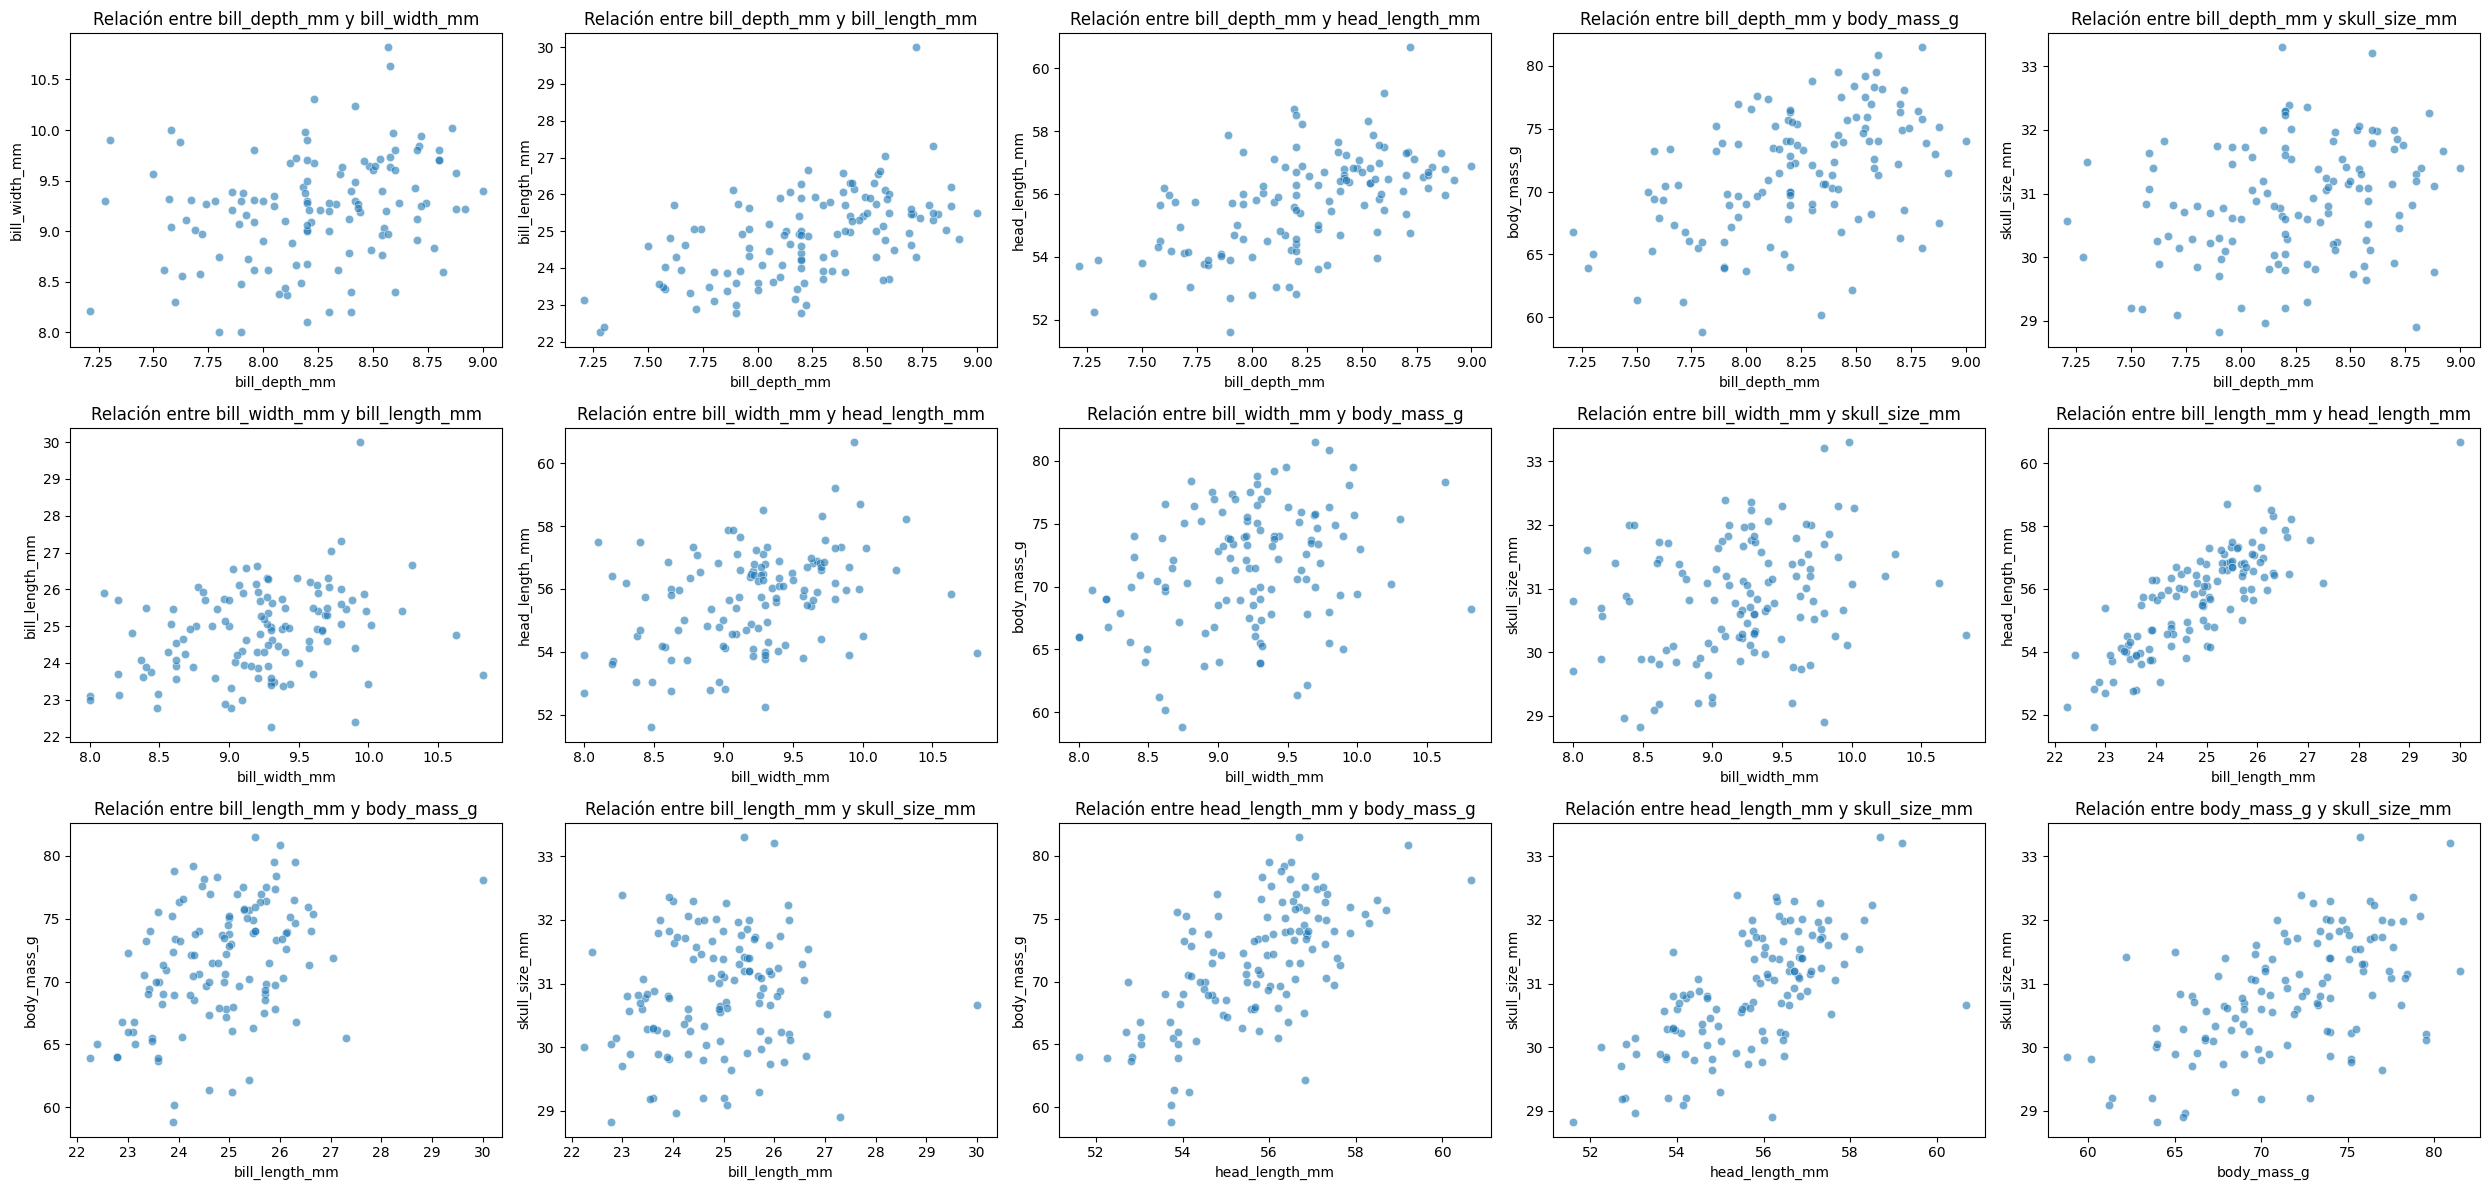

In [27]:
# Crear todas las combinaciones posibles de los elementos únicos
combinaciones_unicas = list(itertools.combinations(variables, 2))

# Determinamos la cantidad de diagramas a realizar
num_graficos = len(combinaciones_unicas)
# Cantidad constante de las columnas
columnas = 5
filas = (num_graficos // columnas) + (num_graficos % columnas > 0)

# Generar el gráfico y los ejes correspondientes
fig, ejes = plt.subplots(nrows=filas, ncols=columnas, figsize=(25, filas * 4))
# Transformar en una lista unidimensional
ejes = ejes.flatten()

# Crear los diagramas de dispersión para cada par de variables
for i, (x, y) in enumerate(combinaciones_unicas):
    sns.scatterplot(data=data_filtrada, x=x, y=y, alpha=0.6, ax=ejes[i])
    ejes[i].set_title(f"Relación entre {x} y {y}")
    ejes[i].set_xlabel(x)
    ejes[i].set_ylabel(y)

# Esconder los ejes vacíos
for j in range(i + 1, len(ejes)):
    ejes[j].axis('off')

plt.tight_layout()
plt.show()

##**Normalizamos los datos filtrados y Calculamos la matriz de covarianza.**

In [42]:
# Normalizamos los datos filtrados.
data_filtrada_estandarizada = (data_filtrada - data_filtrada.mean()) / data_filtrada.std()


# Calculamos la matriz de covarianza
cov_matrix = np.cov(data_filtrada_estandarizada, rowvar=False)

##**Calculamos los valores y vectores propios.**

In [43]:
# Calculamos los valores y vectores propios
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Mostramos los resultados de la matriz de covarianza
print("Matriz de Covarianza:")
print(cov_matrix)


Matriz de Covarianza:
[[1.         0.27011823 0.55218158 0.55770551 0.47285117 0.24669135]
 [0.27011823 1.         0.29647043 0.36176822 0.28974633 0.23905662]
 [0.55218158 0.29647043 1.         0.81482154 0.4098282  0.11262944]
 [0.55770551 0.36176822 0.81482154 1.         0.6294447  0.66779309]
 [0.47285117 0.28974633 0.4098282  0.6294447  1.         0.5528629 ]
 [0.24669135 0.23905662 0.11262944 0.66779309 0.5528629  1.        ]]


In [44]:
# Mostramos los resultados de los valores propios
print("\nValores propios:")
print(eigenvalues)


Valores propios:
[3.24625083e+00 1.00333255e+00 8.07170209e-01 5.42369011e-01
 4.00875612e-01 1.78965378e-06]


In [45]:
# Mostramos los resultados de los vectors propios
print("\nVectores propios:")
print(eigenvectors)



Vectores propios:
[[-3.96985691e-01 -3.42262537e-01  1.52675802e-01 -7.06649851e-01
  -4.50105291e-01  1.78260034e-04]
 [-2.81040838e-01 -4.49265410e-02 -9.58222042e-01 -2.83844499e-02
   1.56950604e-03  1.74613094e-04]
 [-4.20931181e-01 -5.44180448e-01  1.36291663e-01  4.39217464e-01
   1.41941341e-01  5.43184903e-01]
 [-5.23157620e-01  7.87571214e-03  1.40753884e-01  4.04039000e-01
  -1.31442872e-01 -7.25194925e-01]
 [-4.30888022e-01  2.77787878e-01  1.25176047e-01 -3.56510477e-01
   7.70973799e-01 -2.12360773e-04]
 [-3.56197930e-01  7.12374529e-01  6.66670921e-02  1.28767608e-01
  -4.06912265e-01  4.23133991e-01]]


##**Determinamos la varianza explicada y total acumulada.**

In [46]:
# Determinamos la varianza atribuida a cada componente.
varianza_explicada = eigenvalues / np.sum(eigenvalues)

# Determinamos la variación total acumulada.
varianza_acumulada = np.cumsum(varianza_explicada)

# Establecemos cuántos componentes se requieren para explicar el 90% de la variación
n_componentes_90 = np.argmax(varianza_acumulada >= 0.90) + 1



##**RESULTADOS**

In [47]:
# Mostramos los resultados
print("varianza atribuida a cada componente:")
print(varianza_explicada)

varianza atribuida a cada componente:
[5.41041805e-01 1.67222092e-01 1.34528368e-01 9.03948351e-02
 6.68126020e-02 2.98275630e-07]


In [48]:
# Mostramos los resultados
print("\nVarianza total acumulada:")
print(varianza_explicada)


Varianza total acumulada:
[5.41041805e-01 1.67222092e-01 1.34528368e-01 9.03948351e-02
 6.68126020e-02 2.98275630e-07]


In [49]:
# Mostramos los resultados
print(f"\nNúmero de componentes necesarios para el 90% de la varianza: {n_componentes_90}")
print(varianza_acumulada)



Número de componentes necesarios para el 90% de la varianza: 4
[0.5410418  0.7082639  0.84279226 0.9331871  0.9999997  1.        ]
